## Init

In [1]:
import os

path = os.getcwd()
# set the working directory
os.chdir('c:\\Github\\new-peak-project\\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *
from models.Utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import roadrunner
import numpy as np
import pandas as pd

# import scikit-learn
from sklearn.linear_model import LinearRegression
# tree models and support vector machines
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import pearson correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from copy import deepcopy

### Notebook Parameters

In [4]:
import os

# parameters
notebook_name = 'test1'

# Generation of ground truth model

model_name = 'v3_small_model_52'
o_random_seed = 4
no_observable_species = 5
no_feedback_regulations = 2
specie_value_range = (5, 5000)
param_range = (0.1, 10)
param_multiplier_range = (0.7, 1.3)

# Simulation parameters

simulation_time = 500
simulation_step = 100

# Feature data generation

feature_generation_method = 'uniform'
feature_generation_extra_params = {'min': 0.1, 'max': 10}
feature_generation_size = 1000
feature_generation_seed = 50  # if -1 then 'o_random_seed' is used
if feature_generation_seed == -1:
    feature_generation_seed = o_random_seed


data_engineering_method = 'dynamic_feature'
''' 
Options: 
- 'last_time_point' : only the last time point of the phosphorylated species is used
- 'dynamic_feature': computes the characteristic 'ten' dynamic feature for each specie data 
'''

# General parameters
parallelise = True
save_figures = True
experiment_id = notebook_name + '_' + \
    str(o_random_seed) + '_' + str(feature_generation_seed)
experiment_folder = config['DATA_PATH'] + '/' + experiment_id + '/'
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)

print(experiment_folder)

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments/test1_4_50/


In [5]:
import os

path = os.getcwd()
# set the working directory
os.chdir('c:\\Github\\new-peak-project\\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [6]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [7]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *
from models.Utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import roadrunner
import numpy as np
import pandas as pd

# import scikit-learn
from sklearn.linear_model import LinearRegression
# tree models and support vector machines
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import pearson correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from copy import deepcopy

## Loading FGFR4 Model Direct .txtbc to SBML conversion 

In [8]:
with open('notebooks/tests/FGFR4_model_rev2a.xml', 'r') as file:
    model_xml = file.read()

In [9]:
from models.Solver.RoadrunnerSolver import RoadrunnerSolver
new_rr_solver = RoadrunnerSolver()
new_rr_solver.compile(model_xml)

In [10]:
# Access the model object directly

rr_instance = new_rr_solver.roadrunner_instance
model = rr_instance.model

# Get names
parameter_names     = model.getGlobalParameterIds()
state_variable_names = model.getFloatingSpeciesIds()
boundary_species     = model.getBoundarySpeciesIds()
compartments         = model.getCompartmentIds()
reactions            = model.getReactionIds()

# Print results
print("Global Parameters:", parameter_names)
print("State Variables:", state_variable_names)
print("Boundary Species:", boundary_species)
print("Compartments:", compartments)
print("Reactions:", reactions)


Global Parameters: ['kc01f', 'Vm01r', 'ki01r', 'kc02f', 'Ki02f', 'Vm02r', 'ki02r1', 'ki02r2', 'kc03f', 'Vm03r', 'ki03r', 'kc04f', 'ki04f', 'Vm04r', 'kc05f1', 'kc05f2', 'kc05f3', 'Vm05r', 'kc06f', 'Ki06f', 'kc06r', 'kc07f', 'Vm07r', 'kc08f', 'Vm08r', 'kc09f', 'Vm09r', 'kc10f', 'Vm10r', 'kc11f', 'ki11f', 'ki11r', 'Vm11r', 'kc12f1', 'kc12f2', 'kc12f3', 'ki12f', 'Vm12r', 'kc13f', 'Vm13r', 'kc14f1', 'kc14f2', 'Vm14r', 'kc15f1', 'kc15f2', 'ki15f', 'Vm15r', 'kc16f', 'ki16f1', 'ki16f2', 'Vm16r', 'kc17f', 'Vm17r', 'kc18f', 'Vm18r', 'kc19f', 'alpha19f', 'ki19f', 'Vm19r', 'kc20f', 'alpha20f', 'ki20f1', 'ki20f2', 'Vm20r', 'vs21', 'kc21', 'Km21', 'kc23', 'Km23', 'kc24', 'kc25f', 'kc25r', 'kc26', 'vs27', 'kc27a', 'Km27a', 'kc27b', 'Km27b', 'kc29', 'Km29', 'kc31f', 'Vm31r', 'n02', 'Kmf02', 'n06', 'Kmf06', 'kc03f2', 'ki03f', 'Ki03f2', 'kc05f4', 'kc32f', 'Vm32r', 'Ki08f', 'Ki17f', 'kc33f', 'Vm33r', 'kc08f1', 'ki33f', 'kc09f1', 'Kmf08', 'Kmf17', 'Kmf03', 'PTEN', 'IGF0', 'HRG0', 'FGF0', 'IGF_on', 'FGF_on

In [11]:
# get the number of parameters and state variables in the model
no_parameters = len(parameter_names)
no_state_variables = len(state_variable_names)

print(f'Number of parameters: {no_parameters}')
print(f'Number of state variables: {no_state_variables}')

# although in MATLAB, only the first 115 parameters were modified 

Number of parameters: 123
Number of state variables: 51


In [12]:
model = rr_instance.model

# Get names
parameter_names      = model.getGlobalParameterIds()
state_variable_names = model.getFloatingSpeciesIds()

# Get values
parameter_values     = [model[name] for name in parameter_names]
state_variable_values = [model[name] for name in state_variable_names]

# Combine names and values into tuples
parameters = list(zip(parameter_names, parameter_values))
states     = list(zip(state_variable_names, state_variable_values))

# Print results
print("Global Parameters:")
for name, val in parameters:
    print(f"  {name}: {val}")

print("\nState Variables:")
for name, val in states:
    print(f"  {name}: {val}")


Global Parameters:
  kc01f: 0.01
  Vm01r: 0.01
  ki01r: 1.0
  kc02f: 0.01
  Ki02f: 1.0
  Vm02r: 0.01
  ki02r1: 0.1
  ki02r2: 0.1
  kc03f: 0.01
  Vm03r: 0.01
  ki03r: 0.1
  kc04f: 0.01
  ki04f: 1.0
  Vm04r: 0.1
  kc05f1: 0.01
  kc05f2: 0.01
  kc05f3: 0.01
  Vm05r: 0.1
  kc06f: 0.01
  Ki06f: 1.0
  kc06r: 0.1
  kc07f: 0.01
  Vm07r: 0.01
  kc08f: 0.01
  Vm08r: 0.01
  kc09f: 0.01
  Vm09r: 0.01
  kc10f: 0.01
  Vm10r: 0.01
  kc11f: 0.01
  ki11f: 0.1
  ki11r: 0.1
  Vm11r: 0.01
  kc12f1: 0.01
  kc12f2: 0.01
  kc12f3: 0.01
  ki12f: 0.1
  Vm12r: 0.01
  kc13f: 0.01
  Vm13r: 0.01
  kc14f1: 0.01
  kc14f2: 0.01
  Vm14r: 0.01
  kc15f1: 0.01
  kc15f2: 0.01
  ki15f: 0.01
  Vm15r: 0.01
  kc16f: 0.01
  ki16f1: 0.1
  ki16f2: 0.1
  Vm16r: 0.1
  kc17f: 0.01
  Vm17r: 0.01
  kc18f: 0.01
  Vm18r: 0.01
  kc19f: 0.01
  alpha19f: 0.1
  ki19f: 0.1
  Vm19r: 0.01
  kc20f: 0.01
  alpha20f: 0.1
  ki20f1: 0.1
  ki20f2: 0.1
  Vm20r: 0.01
  vs21: 0.01
  kc21: 0.1
  Km21: 1.0
  kc23: 0.01
  Km23: 1.0
  kc24: 0.1
  kc25f: 0

In [13]:
import pandas as pd

# Load the CSV file correctly
best_parameters = pd.read_csv('notebooks/tests/fitted_paramsets_rev2_STEP3.csv', header=None)


In [14]:
# create a dictionary with the parameter names and values
parameter_dict = {name: value for name, value in zip(parameter_names, best_parameters.iloc[0, 1:])}
# special parameters for the model
parameter_dict['FGFR4i_0'] = 100
parameter_dict['PI3Ki_0'] = 0
parameter_dict['ERBBi_0'] = 0
parameter_dict['AKTi_0'] = 0
parameter_dict['MEKi_0'] = 0

print("Parameter Dictionary:")
for name, value in parameter_dict.items():
    print(f"  {name}: {value}")

Parameter Dictionary:
  kc01f: 3.02
  Vm01r: 785.0
  ki01r: 7940.0
  kc02f: 6.92
  Ki02f: 259.0
  Vm02r: 2.08
  ki02r1: 0.413
  ki02r2: 306.0
  kc03f: 28.9
  Vm03r: 9990.0
  ki03r: 6.06
  kc04f: 0.000939
  ki04f: 0.0812
  Vm04r: 0.00201
  kc05f1: 0.00813
  kc05f2: 149.0
  kc05f3: 0.753
  Vm05r: 1240.0
  kc06f: 0.000137
  Ki06f: 118.0
  kc06r: 1.9
  kc07f: 24.1
  Vm07r: 60.8
  kc08f: 19.1
  Vm08r: 803.0
  kc09f: 23.1
  Vm09r: 799.0
  kc10f: 9890.0
  Vm10r: 7590.0
  kc11f: 0.0239
  ki11f: 1.42e-05
  ki11r: 1.54e-05
  Vm11r: 1210.0
  kc12f1: 2.36
  kc12f2: 0.00401
  kc12f3: 0.000201
  ki12f: 0.00182
  Vm12r: 1160.0
  kc13f: 328.0
  Vm13r: 5560.0
  kc14f1: 0.128
  kc14f2: 141.0
  Vm14r: 6130.0
  kc15f1: 1.79
  kc15f2: 0.197
  ki15f: 9260.0
  Vm15r: 250.0
  kc16f: 0.000871
  ki16f1: 576.0
  ki16f2: 0.803
  Vm16r: 82.5
  kc17f: 3.62
  Vm17r: 0.2
  kc18f: 43.7
  Vm18r: 6.86
  kc19f: 0.0158
  alpha19f: 7050.0
  ki19f: 3.98e-05
  Vm19r: 38.6
  kc20f: 0.0317
  alpha20f: 5.72e-06
  ki20f1: 4270.0

In [15]:
all_initial_conditions = pd.read_csv('notebooks/tests/median-ccle_protein_expression-fgfr4_model_ccle_match_rules-375x51-initial_conditions.csv.csv')

In [16]:
all_initial_conditions
# take the x row (without first column) as the initial conditions, create a dictionary and column names as keys
initial_conditions = {name: value for name, value in zip(all_initial_conditions.columns[1:], all_initial_conditions.iloc[3, 1:])}

In [17]:
initial_conditions

{'IGFR': np.float64(134.64273104224688),
 'pIGFR': np.float64(0.0),
 'FGFR4': np.float64(962.77),
 'pFGFR4': np.float64(0.0),
 'ERBB': np.float64(680.21),
 'pERBB': np.float64(0.0),
 'IRS': np.float64(13.04),
 'pIRS': np.float64(0.0),
 'PI3K': np.float64(2.72),
 'aPI3K': np.float64(0.0),
 'PIP2': np.float64(5000.0),
 'PIP3': np.float64(0.0),
 'FRS2': np.float64(20.54),
 'pFRS2': np.float64(0.0),
 'Grb2': np.float64(5484.888715395026),
 'aGrb2': np.float64(0.0),
 'Akt': np.float64(1818.3260958442943),
 'pAkt': np.float64(0.0),
 'PDK1': np.float64(30.696220251490995),
 'aPDK1': np.float64(0.0),
 'mTORC1': np.float64(40.274792484598265),
 'amTORC1': np.float64(0.0),
 'S6K': np.float64(55.03577312057708),
 'pS6K': np.float64(0.0),
 'Sos': np.float64(3.7),
 'aSos': np.float64(0.0),
 'Shp2': np.float64(270.39),
 'aShp2': np.float64(0.0),
 'Ras': np.float64(2613.7149606251205),
 'aRas': np.float64(0.0),
 'Raf': np.float64(104.00331719761068),
 'aRaf': np.float64(0.0),
 'MEK': np.float64(1997.

In [18]:
new_rr_solver.set_parameter_values(parameter_dict)
new_rr_solver.set_state_values(initial_conditions)
result = new_rr_solver.simulate(0, 11440, 11440)

In [19]:
result

,time,IGFR,pIGFR,FGFR4,pFGFR4,ERBB,pERBB,IRS,pIRS,PI3K,...,SPRY2,pSPRY2,mPTP,PTP,Cbl,aCbl,FOXO,pFOXO,mTORC2,amTORC2
0,0.000000,134.642731,0.000000e+00,962.77,0.000000e+00,680.210000,0.000000,13.04,0.000000e+00,2.720000,...,0.000000,0.000000e+00,0.000000,-0.000000,5.430000,0.000000,1025.000000,1025.000000,36.665823,0.000000
1,1.000087,134.642731,0.000000e+00,962.77,0.000000e+00,27.723875,652.486125,13.04,0.000000e+00,0.008431,...,0.000388,0.000000e+00,0.103415,0.004217,0.009927,5.420073,783.554079,1266.445921,25.759067,10.906756
2,2.000175,134.642731,0.000000e+00,962.77,0.000000e+00,30.187982,650.022018,13.04,0.000000e+00,0.007848,...,0.001603,0.000000e+00,0.223146,0.018168,0.009897,5.420103,26.677441,2023.322559,11.279985,25.385838
3,3.000262,134.642731,0.000000e+00,962.77,0.000000e+00,36.588292,643.621708,13.04,0.000000e+00,0.007827,...,0.003422,0.000000e+00,0.342756,0.040140,0.009897,5.420103,1.893868,2048.106132,4.560362,32.105462
4,4.000350,134.642731,0.000000e+00,962.77,0.000000e+00,42.997611,637.212389,13.04,0.000000e+00,0.007839,...,0.005671,0.000000e+00,0.462227,0.068745,0.009897,5.420103,1.441255,2048.558745,1.962888,34.702935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,11435.999650,134.642731,1.346314e-30,962.77,5.728740e-29,676.911963,3.298037,13.04,3.209376e-32,0.009600,...,0.099009,3.329403e-32,99.954703,99.008391,0.012871,5.417129,1.143665,2048.856335,0.403503,36.262320
11436,11436.999738,134.642731,1.346314e-30,962.77,5.728740e-29,676.911963,3.298037,13.04,3.209376e-32,0.009600,...,0.099009,3.329403e-32,99.954704,99.008392,0.012871,5.417129,1.143665,2048.856335,0.403503,36.262320
11437,11437.999825,134.642731,1.346314e-30,962.77,5.728740e-29,676.911963,3.298037,13.04,3.209376e-32,0.009600,...,0.099009,3.329403e-32,99.954704,99.008393,0.012871,5.417129,1.143665,2048.856335,0.403503,36.262320
11438,11438.999913,134.642731,1.346314e-30,962.77,5.728740e-29,676.911963,3.298037,13.04,3.209376e-32,0.009600,...,0.099009,3.329403e-32,99.954704,99.008394,0.012871,5.417129,1.143665,2048.856335,0.403503,36.262320


In [20]:
# drug_response_time = [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]*60; % [min]
# filter out results based on these time points, following time 5000 
drug_response_time = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] 
drug_response_time = [t * 60 for t in drug_response_time]  # convert to seconds
# add 5000 to each time point
drug_response_time = [t + 10000 for t in drug_response_time]

# filter the result based on the drug response time using the time column, by finding the closest time point in the result
time_column = result['time']
# find the closest time point in the result to each drug response time
closest_times = []
for t in drug_response_time:
    closest_time = min(time_column, key=lambda x: abs(x - t))
    closest_times.append(closest_time)
# filter the result based on the closest times
filtered_result = result[result['time'].isin(closest_times)]
# reset the index of the filtered result
filtered_result.reset_index(drop=True, inplace=True)
# convert to pandas DataFrame
filtered_result_df = pd.DataFrame(filtered_result)

In [21]:
filtered_result_df

,time,IGFR,pIGFR,FGFR4,pFGFR4,ERBB,pERBB,IRS,pIRS,PI3K,...,SPRY2,pSPRY2,mPTP,PTP,Cbl,aCbl,FOXO,pFOXO,mTORC2,amTORC2
0,9999.874115,134.642731,1.346364e-30,962.77,5.728937e-29,676.911850,3.298150,13.04,3.209497e-32,0.0096,...,0.099009,3.329526e-32,99.954196,99.004672,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
1,10059.879360,134.642731,1.346361e-30,962.77,5.728922e-29,676.911859,3.298141,13.04,3.209488e-32,0.0096,...,0.099009,3.329517e-32,99.954237,99.004951,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
2,10119.884605,134.642731,1.346357e-30,962.77,5.728908e-29,676.911867,3.298133,13.04,3.209479e-32,0.0096,...,0.099009,3.329508e-32,99.954276,99.005214,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
3,10179.889851,134.642731,1.346354e-30,962.77,5.728895e-29,676.911874,3.298126,13.04,3.209471e-32,0.0096,...,0.099009,3.329500e-32,99.954312,99.005464,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
4,10239.895096,134.642731,1.346351e-30,962.77,5.728883e-29,676.911881,3.298119,13.04,3.209463e-32,0.0096,...,0.099009,3.329492e-32,99.954346,99.005700,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
5,10299.900341,134.642731,1.346348e-30,962.77,5.728871e-29,676.911888,3.298112,13.04,3.209456e-32,0.0096,...,0.099009,3.329485e-32,99.954378,99.005923,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
6,10359.905586,134.642731,1.346345e-30,962.77,5.728860e-29,676.911895,3.298105,13.04,3.209449e-32,0.0096,...,0.099009,3.329478e-32,99.954408,99.006134,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
7,10419.910831,134.642731,1.346342e-30,962.77,5.728849e-29,676.911901,3.298099,13.04,3.209443e-32,0.0096,...,0.099009,3.329471e-32,99.954436,99.006332,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
8,10479.916077,134.642731,1.346340e-30,962.77,5.728839e-29,676.911906,3.298094,13.04,3.209437e-32,0.0096,...,0.099009,3.329465e-32,99.954462,99.006518,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232
9,10539.921322,134.642731,1.346337e-30,962.77,5.728830e-29,676.911912,3.298088,13.04,3.209431e-32,0.0096,...,0.099009,3.329459e-32,99.954486,99.006694,0.012871,5.417129,1.143665,2048.856335,0.403503,36.26232


## Loading FGFR4 model

In [80]:
with open('scripts/FGFR4_model_rev2a.ant', 'r') as file:
    model_string = file.read()

In [81]:
model_string

'model FGFR4_RTK_model\n\n# Reactions\nJ0_f: IGFR -> pIGFR; kc01f * IGF * IGFR\nJ0_r: pIGFR -> IGFR; Vm01r * (1 + ki01r*PTP) * pIGFR\nJ1_f: FGFR4 -> pFGFR4; kc02f * FGF * FGFR4 /(1 + Ki02f*(FGFR4i^n02/(Kmf02^n02 + FGFR4i^n02)))\nJ1_r: pFGFR4 -> FGFR4; Vm02r *  (1 + ki02r1*PTP)*(1 + ki02r2*aCbl) * pFGFR4\nJ2_f: ERBB -> pERBB; (kc03f * HRG + kc03f2 * FOXO)* ERBB / (1+ ki03f *pERK) / (1 + Ki03f2*(ERBBi/(Kmf03 + ERBBi)))\nJ2_r: pERBB -> ERBB; Vm03r *  (1 + ki03r*PTP)  * pERBB\nJ3_f: IRS -> pIRS; kc04f * pIGFR * IRS  / (1+ ki04f *pS6K)\nJ3_r: pIRS -> IRS; Vm04r * pIRS\nJ4_f: PI3K -> aPI3K; (kc05f1 * pIRS + kc05f2 * (aGAB1 + aGAB2) + kc05f3 * aRas + kc05f4 * pERBB) * PI3K /(1 + Ki06f*(PI3Ki^n06/(Kmf06^n06 + PI3Ki^n06)))\nJ4_r: aPI3K -> PI3K; Vm05r * aPI3K\nJ5_f: PIP2 -> PIP3; kc06f * aPI3K * PIP2\nJ5_r: PIP3 -> PIP2; kc06r * PTEN * PIP3\nJ6_f: PDK1 -> aPDK1; kc07f * PIP3 * PDK1\nJ6_r: aPDK1 -> PDK1; Vm07r * aPDK1\nJ7_f: Akt -> pAkt; (kc08f * aPDK1 + kc08f1 * amTORC2) * Akt / (1 + Ki08f*(AKTi

In [82]:
from models.Solver.ScipySolver import ScipySolver
from models.Solver.RoadrunnerSolver import RoadrunnerSolver

new_scipy_solver = ScipySolver()
new_rr_solver = RoadrunnerSolver()

new_scipy_solver.compile(model_string)

In [83]:
import antimony

ant_model = model_string
antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)

new_rr_solver.compile(sbml_model)

In [84]:
print(sbml_model)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.15.0 with libSBML version 5.20.2. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version2/core" level="3" version="2">
  <model metaid="FGFR4_RTK_model" id="FGFR4_RTK_model">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="IGFR" compartment="default_compartment" initialConcentration="7.58" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pIGFR" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="FGFR4" compartment="default_compartment" initialConcentration="962.77" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pFGFR4" compartment="default_compartment" initialConc

In [97]:
result = new_rr_solver.simulate(0, 5000, 5000)


In [98]:
result

,time,IGFR,pIGFR,FGFR4,pFGFR4,aCbl,ERBB,pERBB,FOXO,pERK,...,aRaf,SPRY2,MEK,pMEK,ERK,GAB1,GAB2,Cbl,pFOXO,mTORC2
0,0.0000,7.58,0.000000e+00,962.77,0.000000e+00,0.000000,680.210000,0.000000,1025.000000,0.000000,...,0.000000,0.0,1997.800000,0.000000,2054.400000,20.030000,4.260000,5.430000,1025.000000,13.170000
1,1.0002,7.58,0.000000e+00,962.77,0.000000e+00,5.421543,10.325382,669.884618,960.605338,1471.801455,...,26.910146,0.0,1657.209815,340.590185,582.598545,0.041693,0.015195,0.008457,1089.394662,9.220935
2,2.0004,7.58,0.000000e+00,962.77,0.000000e+00,5.421564,13.104380,667.105620,355.897856,2048.756969,...,25.942772,0.0,1276.471888,721.328112,5.643031,0.053151,0.047007,0.008436,1694.102144,3.636370
3,3.0006,7.58,0.000000e+00,962.77,0.000000e+00,5.421564,18.761608,661.448392,29.947332,2052.291598,...,24.782999,0.0,998.232647,999.567353,2.108402,0.046888,0.079546,0.008436,2020.052668,1.238765
4,4.0008,7.58,0.000000e+00,962.77,0.000000e+00,5.421564,25.232809,654.977191,5.023500,2052.674015,...,23.744536,0.0,793.119763,1204.680237,1.725985,0.044576,0.111154,0.008436,2044.976500,0.455787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995.9992,7.58,0.000000e+00,962.77,0.000000e+00,5.421481,592.416290,87.793710,3.191136,2053.321340,...,20.204576,0.0,94.215515,1903.584485,1.078660,0.043810,0.532272,0.008519,2046.808864,0.130669
4996,4996.9994,7.58,0.000000e+00,962.77,0.000000e+00,5.421481,592.416290,87.793710,3.191136,2053.321340,...,20.204576,0.0,94.215515,1903.584485,1.078660,0.043810,0.532272,0.008519,2046.808864,0.130669
4997,4997.9996,7.58,0.000000e+00,962.77,0.000000e+00,5.421481,592.416290,87.793710,3.191136,2053.321340,...,20.204576,0.0,94.215515,1903.584485,1.078660,0.043810,0.532272,0.008519,2046.808864,0.130669
4998,4998.9998,7.58,0.000000e+00,962.77,0.000000e+00,5.421481,592.416290,87.793710,3.191136,2053.321340,...,20.204576,0.0,94.215515,1903.584485,1.078660,0.043810,0.532272,0.008519,2046.808864,0.130669


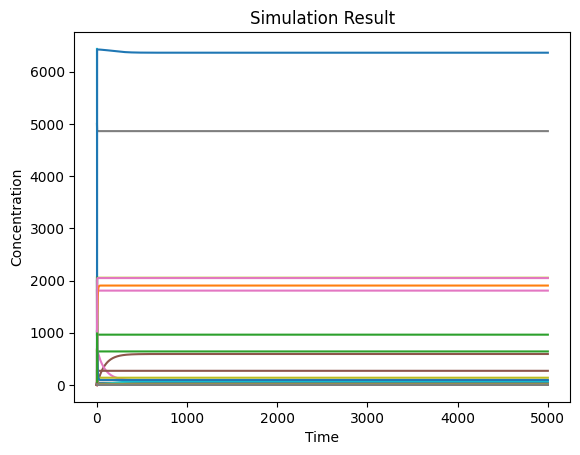

In [99]:
# plot result in a basic way 
import matplotlib.pyplot as plt
# extract columns from result
time = result['time']
species = result.columns[1:]
# plot each species
for specie in species:
    plt.plot(time, result[specie], label=specie)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Simulation Result')
# plt.legend()
plt.show()

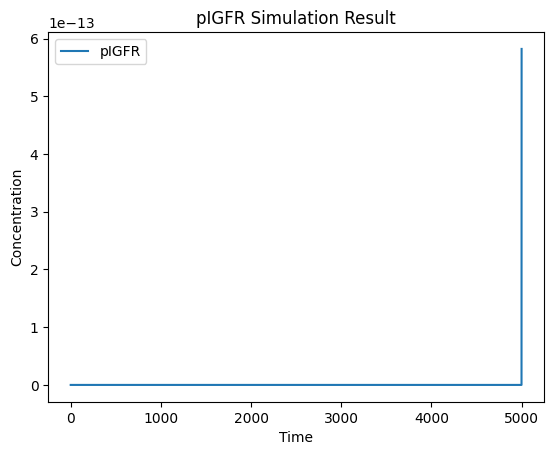

In [100]:
# plot only the 'pIGFR' species
plt.plot(time, result['pIGFR'], label='pIGFR')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('pIGFR Simulation Result')
plt.legend()
plt.show()

## All initial conditions

In [22]:
all_initial_conditions

,Unnamed: 0,IGFR,pIGFR,FGFR4,pFGFR4,ERBB,pERBB,IRS,pIRS,PI3K,...,SPRY2,pSPRY2,mPTP,PTP,Cbl,aCbl,FOXO,pFOXO,mTORC2,amTORC2
0,ACH-000849,137.797340,0.0,962.77,0.0,11127.967006,0.0,130.249858,0.0,2.720000,...,0.0,0.0,0.0,0.0,5.430000,0.0,1025.000000,1025.0,77.694924,0.0
1,ACH-000441,7.580000,0.0,962.77,0.0,19050.104634,0.0,13.040000,0.0,2.720000,...,0.0,0.0,0.0,-0.0,5.430000,0.0,29974.705914,1025.0,32.463241,0.0
2,ACH-000248,60.510561,0.0,962.77,0.0,14035.650666,0.0,127.643470,0.0,2.720000,...,0.0,0.0,0.0,-0.0,11.373179,0.0,25326.986959,1025.0,13.170000,0.0
3,ACH-000684,134.642731,0.0,962.77,0.0,680.210000,0.0,13.040000,0.0,2.720000,...,0.0,0.0,0.0,-0.0,5.430000,0.0,1025.000000,1025.0,36.665823,0.0
4,ACH-000856,7.580000,0.0,962.77,0.0,680.210000,0.0,160.689958,0.0,2.720000,...,0.0,0.0,0.0,-0.0,15.791443,0.0,9709.016552,1025.0,43.537808,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ACH-000846,7.580000,0.0,962.77,0.0,1479.644618,0.0,45.860638,0.0,9.613634,...,0.0,0.0,0.0,0.0,5.430000,0.0,1025.000000,1025.0,13.170000,0.0
371,ACH-000265,7.580000,0.0,962.77,0.0,680.210000,0.0,13.040000,0.0,9.081391,...,0.0,0.0,0.0,-0.0,5.430000,0.0,5562.197300,1025.0,131.926987,0.0
372,ACH-000006,370.479852,0.0,962.77,0.0,680.210000,0.0,13.040000,0.0,2.720000,...,0.0,0.0,0.0,-0.0,89.329177,0.0,537.716665,1025.0,13.170000,0.0
373,ACH-000696,7.580000,0.0,962.77,0.0,28039.249726,0.0,13.040000,0.0,4.549657,...,0.0,0.0,0.0,-0.0,5.430000,0.0,13364.742273,1025.0,142.297006,0.0


In [27]:
# rename first column to 'cell_line'
all_initial_conditions.rename(columns={all_initial_conditions.columns[0]: 'ID'}, inplace=True)

In [28]:
all_initial_conditions

,ID,IGFR,pIGFR,FGFR4,pFGFR4,ERBB,pERBB,IRS,pIRS,PI3K,...,SPRY2,pSPRY2,mPTP,PTP,Cbl,aCbl,FOXO,pFOXO,mTORC2,amTORC2
0,ACH-000849,137.797340,0.0,962.77,0.0,11127.967006,0.0,130.249858,0.0,2.720000,...,0.0,0.0,0.0,0.0,5.430000,0.0,1025.000000,1025.0,77.694924,0.0
1,ACH-000441,7.580000,0.0,962.77,0.0,19050.104634,0.0,13.040000,0.0,2.720000,...,0.0,0.0,0.0,-0.0,5.430000,0.0,29974.705914,1025.0,32.463241,0.0
2,ACH-000248,60.510561,0.0,962.77,0.0,14035.650666,0.0,127.643470,0.0,2.720000,...,0.0,0.0,0.0,-0.0,11.373179,0.0,25326.986959,1025.0,13.170000,0.0
3,ACH-000684,134.642731,0.0,962.77,0.0,680.210000,0.0,13.040000,0.0,2.720000,...,0.0,0.0,0.0,-0.0,5.430000,0.0,1025.000000,1025.0,36.665823,0.0
4,ACH-000856,7.580000,0.0,962.77,0.0,680.210000,0.0,160.689958,0.0,2.720000,...,0.0,0.0,0.0,-0.0,15.791443,0.0,9709.016552,1025.0,43.537808,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ACH-000846,7.580000,0.0,962.77,0.0,1479.644618,0.0,45.860638,0.0,9.613634,...,0.0,0.0,0.0,0.0,5.430000,0.0,1025.000000,1025.0,13.170000,0.0
371,ACH-000265,7.580000,0.0,962.77,0.0,680.210000,0.0,13.040000,0.0,9.081391,...,0.0,0.0,0.0,-0.0,5.430000,0.0,5562.197300,1025.0,131.926987,0.0
372,ACH-000006,370.479852,0.0,962.77,0.0,680.210000,0.0,13.040000,0.0,2.720000,...,0.0,0.0,0.0,-0.0,89.329177,0.0,537.716665,1025.0,13.170000,0.0
373,ACH-000696,7.580000,0.0,962.77,0.0,28039.249726,0.0,13.040000,0.0,4.549657,...,0.0,0.0,0.0,-0.0,5.430000,0.0,13364.742273,1025.0,142.297006,0.0


In [30]:
# export to hdf5
all_initial_conditions.to_hdf('notebooks/tests/shared_dir/src/all_initial_conditions.h5', key='data', mode='w')

## Load default parameters 

In [ ]:
import pandas as pd
import numpy as np
import argparse
import os

def load_csv_as_dict(file_path):
    df = pd.read_csv(file_path)  # Expects headers: 'Parameter', 'Value'
    return dict(zip(df['Parameter'], df['Value']))

## Load simulation data test

In [10]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path+'/src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [8]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

# file_path = f'I:/My Drive/DAWSON PHD PROJECT/Biomarker Data Repository/data/new-peak-project/experiments/matlab_output'

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [18]:
file_path = f'{config["DATA_PATH"]}/matlab_output/batch_simulation_data.csv'

import pandas as pd 
simulation_data = pd.read_csv(file_path, index_col=0)

In [37]:
from scripts.matlab.load_time_course_data import load_timecourse_data
from scripts.matlab.load_feature_data import load_feature_data
from scripts.matlab.load_target_data import load_target_data

time_course_data = load_timecourse_data(simulation_data)


In [21]:
time_course_data

,pIGFR,pFGFR4,pERBB,pIRS,aPI3K,PIP3,pFRS2,aGrb2,pAkt,aPDK1,...,pMEK,pERK,aGAB1,aGAB2,SPRY2,pSPRY2,PTP,aCbl,FOXO,amTORC2
1-ACH-000957-0,"[0.0119886446465455, 0.0120678229232418, 0.012...","[26.7123649616682, 0.171818923473994, 0.175257...","[33.8576919720121, 40.8745064417603, 43.600274...","[0.0013930423264466, 0.0013939880757288, 0.001...","[16.2010191360014, 16.200635690334, 16.2007960...","[0.531761049904652, 0.531748463482604, 0.53175...","[0.146165374410356, 0.0012833156508564, 0.0014...","[6.51367239044346, 2.59957406698431, 2.7744412...","[1679.89658481986, 1684.45237389325, 1689.0171...","[3.09346997738622, 3.09340252624502, 3.0934307...",...,"[0.21605023596488, 0.0438697801285367, 0.02538...","[12316.6674531956, 4558.22524466777, 2892.5717...","[670.592413280694, 659.310541514757, 664.00499...","[1.79449145314064e-14, 1.9300579254959302e-14,...","[0.84099404779681, 10.671860264865, 19.3432862...","[6.58194796853388e-06, 7.33314711766495e-07, 1...","[5.59691094369481, 5.56013060234553, 5.4363526...","[29.62505949507, 29.6216560741539, 29.61867710...","[1.89995654392374, 1.89482223580392, 1.8897053...","[4.89930608731948, 4.92701275964409, 4.9546918..."
2-ACH-000986-1,"[0.0944704199376672, 0.148672142132962, 0.3056...","[25.3389722733024, 0.0560772917571154, 0.09431...","[1742.35806884317, 2360.32379830458, 3433.2223...","[0.365064153565908, 0.370320595075954, 0.40708...","[2.59158197031291, 2.59188535748835, 2.5921891...","[0.633187621216732, 0.633261309660318, 0.63333...","[0.0209054547884952, 4.64257528070798e-05, 7.8...","[60.7198185254852, 78.9973875156326, 114.72458...","[230.908778750138, 231.338971136733, 231.76771...","[0.212530933380139, 0.212547770716748, 0.21256...",...,"[0.0529842824009862, 0.0108713019496989, 0.006...","[231.600495647326, 52.2223003770407, 29.274628...","[402.883321506556, 403.996691616978, 405.11579...","[1.24176952504394e-10, 7.15293728877374e-10, 1...","[3.58726830085683, 19.9496860526514, 36.011711...","[5.9375516610302e-05, 7.33291491085187e-07, 2....","[5.27520079970908, 3.34953696050665, 1.6257289...","[19.3396647097945, 19.3400299262947, 19.342162...","[12.8620594978664, 12.8381637510733, 12.814429...","[2.61067858466111, 2.61861287239627, 2.6265363..."
3-ACH-000713-2,"[0.0719796118468719, 0.105365983360963, 0.1863...","[30.3731777371218, 0.0387060179808396, 0.04631...","[55.9261890912734, 78.5949327986868, 126.55953...","[0.679651401834277, 0.706406881839698, 0.86279...","[2.24765890924446, 2.35129751039184, 2.4675260...","[0.0182300158889924, 0.0190704369195815, 0.020...","[0.0215618266354551, 2.75259535324422e-05, 3.2...","[5.84470030014864, 7.83239871078081, 12.602521...","[120.934354888487, 122.023057826055, 123.22700...","[5.87916069645117, 6.1465114209824, 6.44613561...",...,"[0.0027581522513995, 0.000541033906249, 0.0003...","[17.729886157946, 3.50466297426484, 2.14871886...","[19.5773683725077, 26.3855306406815, 40.747275...","[5.0817114279073304e-09, 3.42002339096013e-08,...","[4.4429283009385, 28.7476146922305, 52.8189450...","[2.35434028981166e-05, 1.94472466402474e-07, 4...","[1.07382623248795, 0.732984735510861, 0.413658...","[19.0395038476866, 19.0398241985547, 19.042294...","[36.1048675188133, 35.8030683165402, 35.444340...","[2.91393359327477, 2.91921962990465, 2.9249372..."
4-ACH-000496-3,"[0.0014593627460185, 0.0014593632358645, 0.001...","[6.54776984277452, 0.0414828140435416, 0.04148...","[22.8735846069886, 22.8778763149032, 22.882444...","[0.0015546891355734, 0.0015545072437124, 0.001...","[2.65892516799981, 2.65883610475195, 2.6588586...","[0.0125554991329, 0.0125550785536262, 0.012555...","[0.0001577386015376, 9.9956313600638e-07, 9.99...","[3.89472316083729, 3.88659790762944, 3.8873739...","[1.81277895580983, 1.81351897255207, 1.8143175...","[0.221316361017917, 0.221308989069281, 0.22131...",...,"[6.45139159142803, 6.368398641863, 6.282830475...","[40219.2523984388, 40207.1818044117, 40194.410...","[62.3026788004981, 62.2038239899269, 62.228833...","[1.2737

In [30]:
target_data = load_target_data(simulation_data, 'pERK')

In [31]:
target_data

,pERK
ID,
1-ACH-000957-0,943.910099
2-ACH-000986-1,3.763042
3-ACH-000713-2,0.248807
4-ACH-000496-3,39913.504580
5-ACH-000915-4,0.103493
6-ACH-000819-5,171.025241
7-ACH-000842-6,0.103418


In [32]:
simulation_data

,IC_ID,ParamSet_ID,Time,pIGFR,pFGFR4,pERBB,pIRS,aPI3K,PIP3,pFRS2,...,pMEK,pERK,aGAB1,aGAB2,SPRY2,pSPRY2,PTP,aCbl,FOXO,amTORC2
RunID,,,,,,,,,,,,,,,,,,,,,
1,ACH-000957,0,0,0.011989,26.712365,33.857692,0.001393,16.201019,0.531761,0.146165,...,0.216050,12316.667453,670.592413,1.794491e-14,0.840994,6.581948e-06,5.596911,29.625059,1.899957,4.899306
1,ACH-000957,0,60,0.012068,0.171819,40.874506,0.001394,16.200636,0.531748,0.001283,...,0.043870,4558.225245,659.310542,1.930058e-14,10.671860,7.333147e-07,5.560131,29.621656,1.894822,4.927013
1,ACH-000957,0,120,0.012342,0.175258,43.600274,0.001402,16.200796,0.531754,0.001420,...,0.025387,2892.571710,664.004997,3.237518e-14,19.343286,1.470775e-06,5.436353,29.618677,1.889705,4.954692
1,ACH-000957,0,180,0.012698,0.179678,45.609487,0.001420,16.200872,0.531756,0.001510,...,0.018557,2192.644356,666.241056,4.457224e-14,26.869394,2.171978e-06,5.283952,29.616013,1.884630,4.982343
1,ACH-000957,0,240,0.013053,0.184067,47.266642,0.001446,16.200919,0.531758,0.001578,...,0.015057,1813.464607,667.624774,5.571214e-14,33.326398,2.816121e-06,5.139833,29.613630,1.879593,5.009966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,ACH-000842,6,1200,0.242345,0.247510,0.000345,0.016810,0.001397,0.000017,0.001001,...,0.000004,0.102219,0.000126,3.375157e-09,120.920846,1.446850e-04,0.025104,3.241641,24.000373,0.743072
7,ACH-000842,6,1260,0.242636,0.247564,0.000346,0.017113,0.001398,0.000017,0.001001,...,0.000004,0.102605,0.000126,3.363807e-09,120.534664,1.442544e-04,0.025072,3.241056,24.008333,0.742814
7,ACH-000842,6,1320,0.242649,0.247609,0.000346,0.017313,0.001398,0.000017,0.001001,...,0.000004,0.102925,0.000126,3.354594e-09,120.224551,1.439094e-04,0.025071,3.240472,24.016297,0.742556


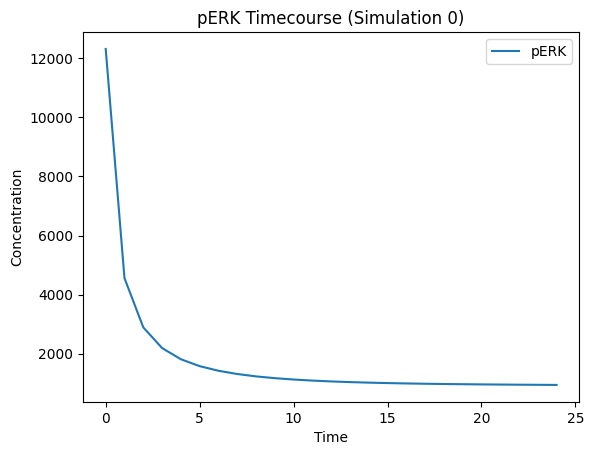

In [34]:
import matplotlib.pyplot as plt

timepoints = range(len(time_course_data.iloc[0]['pERK']))  # assume uniform length
plt.plot(timepoints, time_course_data.iloc[0]['pERK'], label='pERK')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('pERK Timecourse (Simulation 0)')
plt.legend()
plt.show()


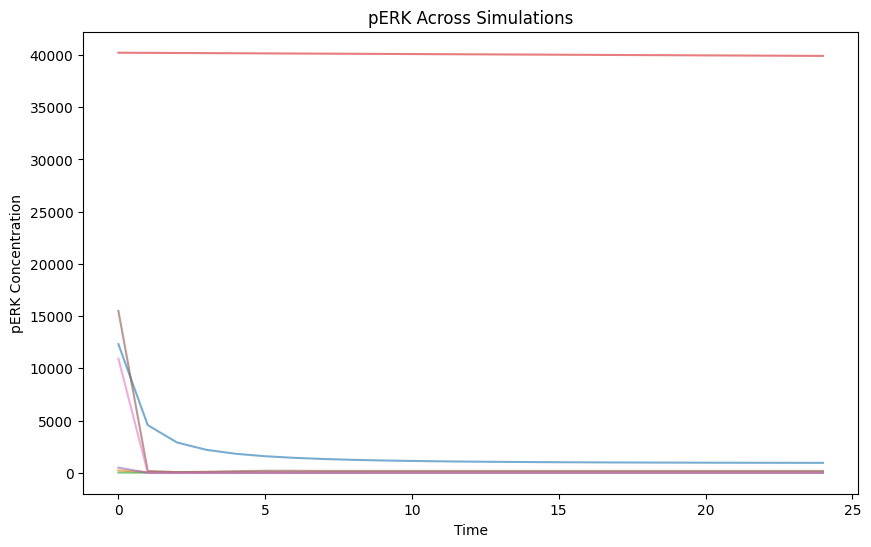

In [35]:
plt.figure(figsize=(10, 6))
for i in range(min(10, len(time_course_data))):  # limit to 10 traces
    plt.plot(time_course_data.iloc[i]['pERK'], alpha=0.6)

plt.xlabel('Time')
plt.ylabel('pERK Concentration')
plt.title('pERK Across Simulations')
plt.show()


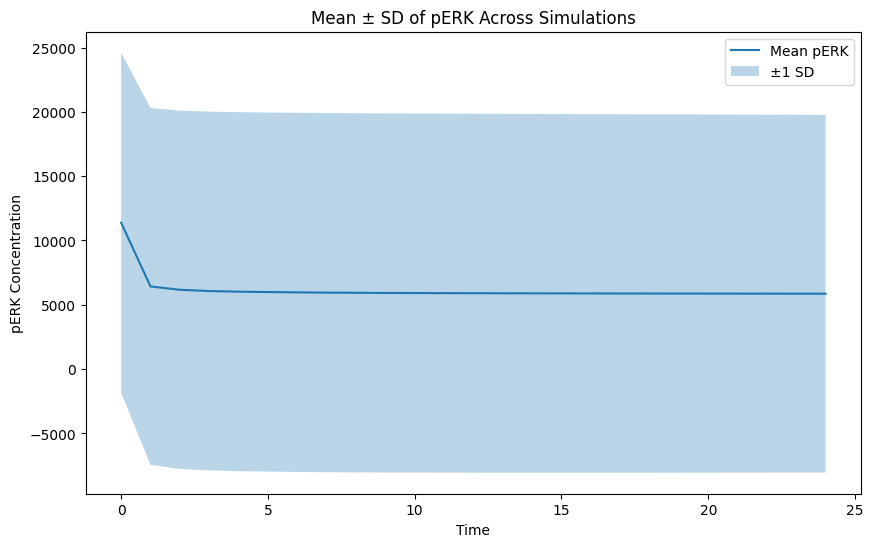

In [36]:
import numpy as np

pERK_array = np.stack(time_course_data['pERK'].values)  # shape: (n_sims, n_timepoints)
mean_traj = pERK_array.mean(axis=0)
std_traj = pERK_array.std(axis=0)
timepoints = range(pERK_array.shape[1])

plt.figure(figsize=(10, 6))
plt.plot(timepoints, mean_traj, label='Mean pERK')
plt.fill_between(timepoints, mean_traj - std_traj, mean_traj + std_traj, alpha=0.3, label='±1 SD')

plt.xlabel('Time')
plt.ylabel('pERK Concentration')
plt.title('Mean ± SD of pERK Across Simulations')
plt.legend()
plt.show()
